In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from voronoi import Voronoi

In [2]:
# !pip install scipy

In [3]:
# def Voronoi():
#     import numpy as np
#     import matplotlib.pyplot as plt
#     from scipy.spatial import Voronoi, voronoi_plot_2d

#     # example of point
#     p1x = 0
#     p1y = 0
#     p2x = 1
#     p2y = 1
#     p3x = 2
#     p3y = 3
#     p4x = -1
#     p4y = 2.5

#     # This vector will include all the points of your Voronoi diagram
#     fullvec = []
#     fullvec.append([p1x, p1y])
#     fullvec.append([p2x, p2y])
#     fullvec.append([p3x, p3y])
#     fullvec.append([p4x, p4y])

#     # convert the list to a numpy array
#     points = np.array(fullvec)

#     # use the Voronoi library
#     vor = Voronoi(points)
#     voronoi_plot_2d(vor)
#     plt.show()


# Voronoi()

In [4]:
points = [(0, 0), (1, 1), (2, 3), (-1, 2.5)]

Point(2.000, 3.000)->Point(-1.000, 2.500)->Point(2.000, 3.000)->
Point(2.000, 3.000)->Point(-1.000, 2.500)->Point(2.000, 3.000)->Point(1.000, 1.000)->Point(2.000, 3.000)->
Point(2.000, 3.000)->Point(-1.000, 2.500)->Point(1.000, 1.000)->Point(2.000, 3.000)->
Point(2.000, 3.000)->Point(-1.000, 2.500)->Point(1.000, 1.000)->Point(0.000, 0.000)->Point(1.000, 1.000)->Point(2.000, 3.000)->
Point(2.000, 3.000)->Point(-1.000, 2.500)->Point(0.000, 0.000)->Point(1.000, 1.000)->Point(2.000, 3.000)->


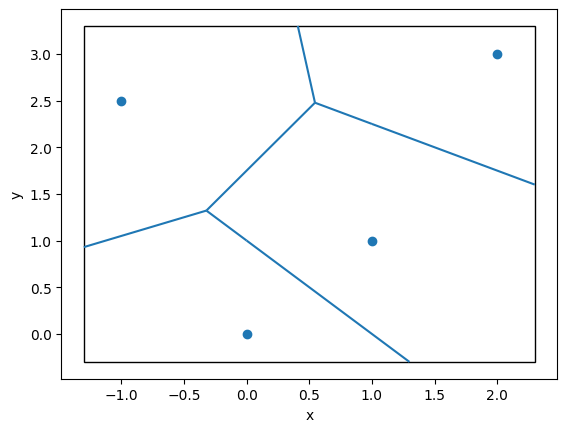

In [5]:
vor = Voronoi(points)
vis = vor.get_voronoi_visualised()
vis.show()

In [6]:
def generate_uniform_points(left, right, n=10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left:  lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    return [np.random.uniform(left, right, 2) for _ in range(n)]

In [7]:
points = generate_uniform_points(-10, 10, 10)

In [8]:
points = [
    [-4.98119373, 6.83857958],
    [-0.12778136, 6.63343697],
    [-7.33037151, 5.50546613],
    [-2.07501278, 3.20578633],
    [5.8388661, -1.68896804],
    [-3.99228758, -3.77928136],
    [9.74501677, -6.04110336],
    [0.98573669, -6.81810449],
    [5.1283655, -9.2936127],
    [8.95603584, -9.51014394],
]

In [9]:
for p in sorted(points, key=lambda x: -x[1]):
    print(p)

[-4.98119373, 6.83857958]
[-0.12778136, 6.63343697]
[-7.33037151, 5.50546613]
[-2.07501278, 3.20578633]
[5.8388661, -1.68896804]
[-3.99228758, -3.77928136]
[9.74501677, -6.04110336]
[0.98573669, -6.81810449]
[5.1283655, -9.2936127]
[8.95603584, -9.51014394]


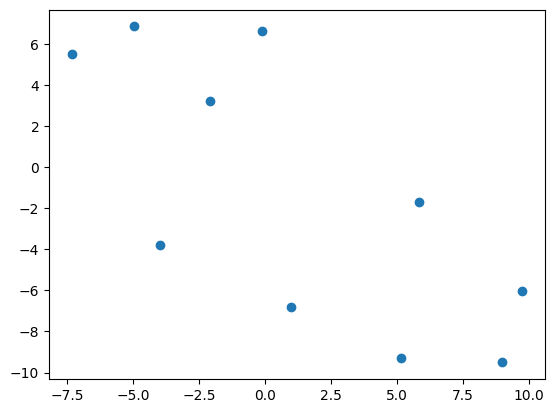

In [10]:
plt.scatter(*zip(*points))

Point(-4.981, 6.839)->Point(-0.128, 6.633)->Point(-4.981, 6.839)->
Point(-4.981, 6.839)->Point(-7.330, 5.505)->Point(-4.981, 6.839)->Point(-0.128, 6.633)->Point(-4.981, 6.839)->
Point(-4.981, 6.839)->Point(-7.330, 5.505)->Point(-4.981, 6.839)->Point(-0.128, 6.633)->Point(-2.075, 3.206)->Point(-0.128, 6.633)->Point(-4.981, 6.839)->
Point(-4.981, 6.839)->Point(-7.330, 5.505)->Point(-4.981, 6.839)->Point(-2.075, 3.206)->Point(-0.128, 6.633)->Point(-4.981, 6.839)->
Point(-4.981, 6.839)->Point(-7.330, 5.505)->Point(-2.075, 3.206)->Point(-0.128, 6.633)->Point(-4.981, 6.839)->
Point(-4.981, 6.839)->Point(-7.330, 5.505)->Point(-2.075, 3.206)->Point(-0.128, 6.633)->Point(5.839, -1.689)->Point(-0.128, 6.633)->Point(-4.981, 6.839)->
Point(-4.981, 6.839)->Point(-7.330, 5.505)->Point(-2.075, 3.206)->Point(5.839, -1.689)->Point(-0.128, 6.633)->Point(-4.981, 6.839)->
Point(-4.981, 6.839)->Point(-7.330, 5.505)->Point(-2.075, 3.206)->Point(-3.992, -3.779)->Point(-2.075, 3.206)->Point(5.839, -1.689)->Po

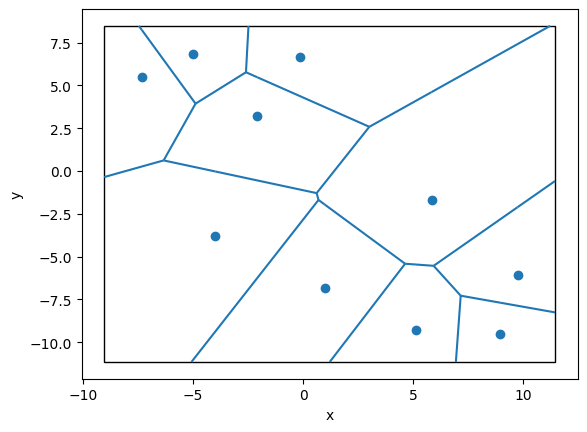

In [11]:
vor = Voronoi(points)
vis = vor.get_voronoi_visualised()
vis.show()

In [12]:
points = generate_uniform_points(-10, 10, 10)

In [13]:
for p in sorted(points, key=lambda x: -x[1]):
    print(p)

[8.42853587 9.06363992]
[-5.80781138  0.77635536]
[ 6.68408242 -0.43725789]
[ 8.05249638 -1.51591291]
[ 2.38663989 -4.24426809]
[-7.9622989  -5.16612031]
[ 7.56528896 -5.74172996]
[-2.71161188 -6.17043999]
[-2.82692035 -9.97893908]
[-5.52980691 -9.98137583]


In [14]:
points = [
    [4.96831207, 8.73658474],
    [6.22802217, 7.48316626],
    [-8.29046443,  7.37948215],
    [-3.37043045,  6.46386103],
    [-0.07248632,  5.59788407],
    [5.52752604, 5.14825604],
    [2.28804169, 1.45765516],
    [-9.30751046, -1.86483428],
    [-5.62135049, -3.04411673],
    [9.81332147, -6.06372514],]

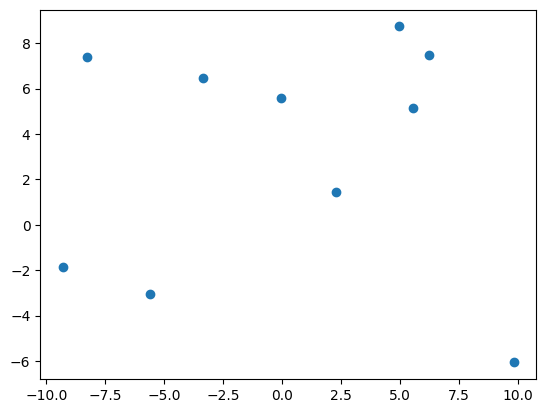

In [15]:
plt.scatter(*zip(*points))

Point(4.968, 8.737)->Point(6.228, 7.483)->Point(4.968, 8.737)->
Point(4.968, 8.737)->Point(-8.290, 7.379)->Point(4.968, 8.737)->Point(6.228, 7.483)->Point(4.968, 8.737)->
Point(4.968, 8.737)->Point(-8.290, 7.379)->Point(-3.370, 6.464)->Point(-8.290, 7.379)->Point(4.968, 8.737)->Point(6.228, 7.483)->Point(4.968, 8.737)->
Point(4.968, 8.737)->Point(-8.290, 7.379)->Point(-3.370, 6.464)->Point(4.968, 8.737)->Point(6.228, 7.483)->Point(4.968, 8.737)->
Point(4.968, 8.737)->Point(-8.290, 7.379)->Point(-3.370, 6.464)->Point(4.968, 8.737)->Point(-0.072, 5.598)->Point(4.968, 8.737)->Point(6.228, 7.483)->Point(4.968, 8.737)->
Point(4.968, 8.737)->Point(-8.290, 7.379)->Point(-3.370, 6.464)->Point(-0.072, 5.598)->Point(4.968, 8.737)->Point(6.228, 7.483)->Point(4.968, 8.737)->
Point(4.968, 8.737)->Point(-8.290, 7.379)->Point(-3.370, 6.464)->Point(-0.072, 5.598)->Point(4.968, 8.737)->Point(6.228, 7.483)->Point(5.528, 5.148)->Point(6.228, 7.483)->Point(4.968, 8.737)->
Point(4.968, 8.737)->Point(-8.290

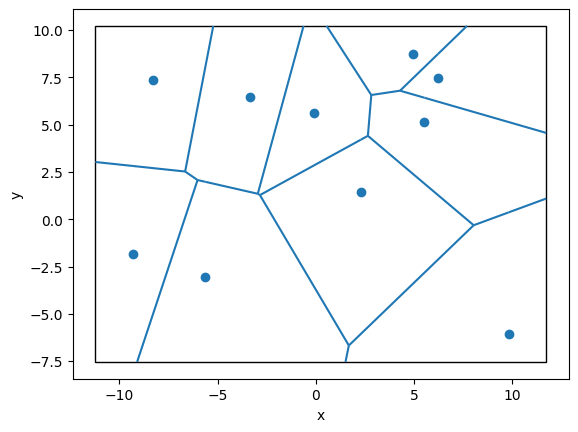

In [16]:
vor = Voronoi(points)
vis = vor.get_voronoi_visualised()
vis.show()

In [18]:
vis.show_gif()

AttributeError: module 'matplotlib.pyplot' has no attribute 'show_gif'

In [ ]:
points = generate_uniform_points(-10, 10, 10)
vor = Voronoi(points)
vis = vor.get_voronoi()
vis.show()

Point(5.680, 8.972)->Point(1.486, 8.512)->Point(5.680, 8.972)->
Point(5.680, 8.972)->Point(1.486, 8.512)->Point(3.964, -0.215)->Point(1.486, 8.512)->Point(5.680, 8.972)->
Point(5.680, 8.972)->Point(1.486, 8.512)->Point(3.964, -0.215)->Point(5.680, 8.972)->
Point(5.680, 8.972)->Point(1.486, 8.512)->Point(3.964, -0.215)->Point(3.213, -2.618)->Point(3.964, -0.215)->Point(5.680, 8.972)->
Point(5.680, 8.972)->Point(1.486, 8.512)->Point(-1.728, -3.472)->Point(1.486, 8.512)->Point(3.964, -0.215)->Point(3.213, -2.618)->Point(3.964, -0.215)->Point(5.680, 8.972)->
Point(5.680, 8.972)->Point(1.486, 8.512)->Point(-1.728, -3.472)->Point(3.964, -0.215)->Point(3.213, -2.618)->Point(3.964, -0.215)->Point(5.680, 8.972)->
Point(5.680, 8.972)->Point(1.486, 8.512)->Point(-7.164, -3.505)->Point(1.486, 8.512)->Point(-1.728, -3.472)->Point(3.964, -0.215)->Point(3.213, -2.618)->Point(3.964, -0.215)->Point(5.680, 8.972)->
Point(5.680, 8.972)->Point(1.486, 8.512)->Point(-7.164, -3.505)->Point(-1.728, -3.472)->P

AttributeError: 'tuple' object has no attribute 'show'

Point(-6.523, 3.860)->Point(-1.501, 3.044)->Point(-6.523, 3.860)->
Point(-6.523, 3.860)->Point(-1.501, 3.044)->Point(8.573, 1.721)->Point(-1.501, 3.044)->Point(-6.523, 3.860)->
Point(-6.523, 3.860)->Point(-1.501, 3.044)->Point(-3.230, 0.301)->Point(-1.501, 3.044)->Point(8.573, 1.721)->Point(-1.501, 3.044)->Point(-6.523, 3.860)->


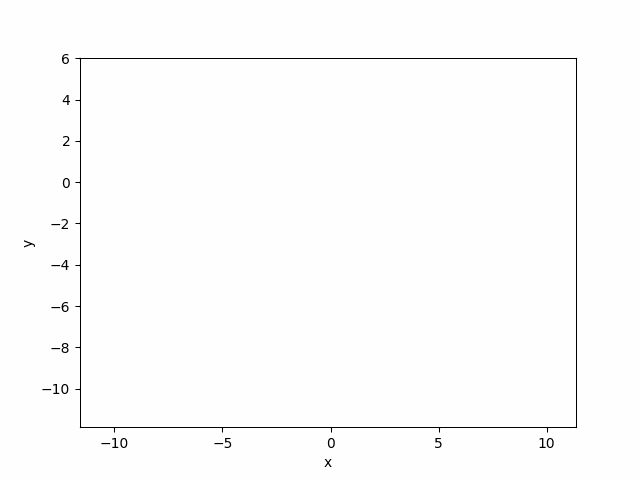

In [ ]:
vor.get_voronoi_visualised().show_gif()